Predicting Per Capita Income of Canada for 2021-2025 based on data of previous years using Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('canada_pci.csv')

In [4]:
df.head()

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [5]:
df.shape

(47, 2)

In [6]:
df.info

<bound method DataFrame.info of     year  per_capita_income
0   1970        3399.299037
1   1971        3768.297935
2   1972        4251.175484
3   1973        4804.463248
4   1974        5576.514583
5   1975        5998.144346
6   1976        7062.131392
7   1977        7100.126170
8   1978        7247.967035
9   1979        7602.912681
10  1980        8355.968120
11  1981        9434.390652
12  1982        9619.438377
13  1983       10416.536590
14  1984       10790.328720
15  1985       11018.955850
16  1986       11482.891530
17  1987       12974.806620
18  1988       15080.283450
19  1989       16426.725480
20  1990       16838.673200
21  1991       17266.097690
22  1992       16412.083090
23  1993       15875.586730
24  1994       15755.820270
25  1995       16369.317250
26  1996       16699.826680
27  1997       17310.757750
28  1998       16622.671870
29  1999       17581.024140
30  2000       18987.382410
31  2001       18601.397240
32  2002       19232.175560
33  2003       2

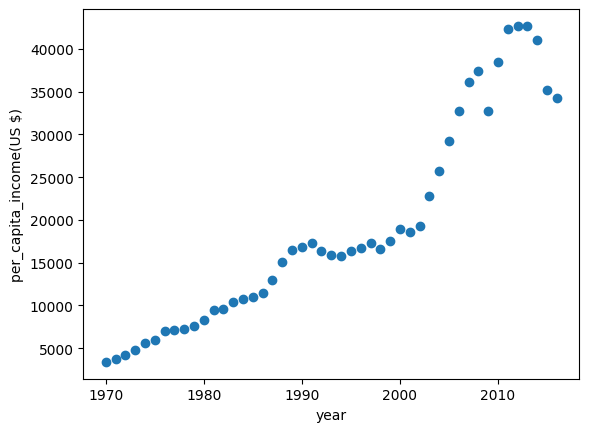

In [7]:
plt.xlabel('year')
plt.ylabel('per_capita_income(US $)')
plt.scatter(df.year,df.per_capita_income)

In [8]:
reg=linear_model.LinearRegression()
reg.fit(df[['year']],df.per_capita_income)

LinearRegression()

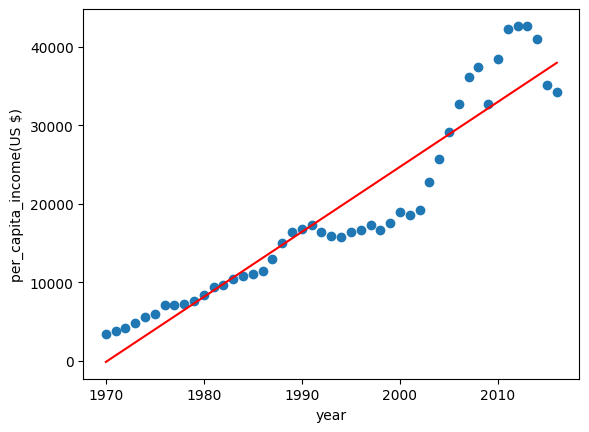

In [9]:
plt.xlabel('year')
plt.ylabel('per_capita_income(US $)')
plt.scatter(df.year,df.per_capita_income)
plt.plot(df.year,reg.predict(df[['year']]),color='red')

In [10]:
reg.predict([[2023]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43774.08932009])

In [12]:
reg.coef_

array([828.46507522])

In [13]:
reg.intercept_

-1632210.7578554575

In [14]:
#Manual checking
print(828.46507522*2023-1632210.7578554575)

43774.08931460255


In [15]:
#Predicting for all years
d=pd.read_csv('years.csv')
p=reg.predict(d)
d['per_capita_income']=p
print(d)

   year  per_capita_income
0  2021       42117.159170
1  2022       42945.624245
2  2023       43774.089320
3  2024       44602.554395
4  2025       45431.019471


In [16]:
d.to_csv('pred.csv')

In [17]:
#Finding Mean MSE for the Model
mse=cross_val_score(reg,df.iloc[:,:-1],df.iloc[:,-1],scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-35573685.949625425
